In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math as m

# Логнормальное распределение
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm
https://ru.wikipedia.org/wiki/%D0%9B%D0%BE%D0%B3%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [32]:
mu=2
sigma=0.7
lognorm=sts.lognorm(s = sigma,scale = m.exp(mu))

## Плотность вероятности

Text(0.5, 0, '$x$')

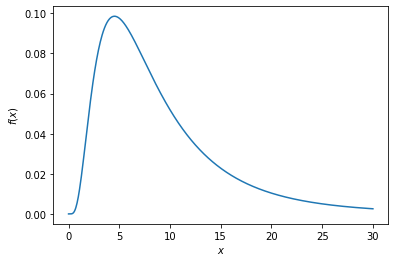

In [33]:
x = np.linspace(0,30,500)
pdf_lognorm = lognorm.pdf(x)
plt.plot(x, pdf_lognorm)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Функция распределения

Text(0.5, 0, '$x$')

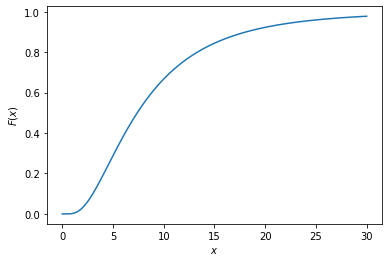

In [34]:
cdf = lognorm.cdf(x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

## Сравнение гистограммы и теоретического плотности

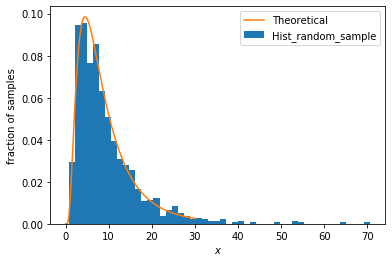

In [35]:
rnd_log=lognorm.rvs(size=1000)
plt.hist(rnd_log, bins=50, density=True, label='Hist_random_sample')
plt.plot(x, pdf_lognorm,label='Theoretical')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

### n=3

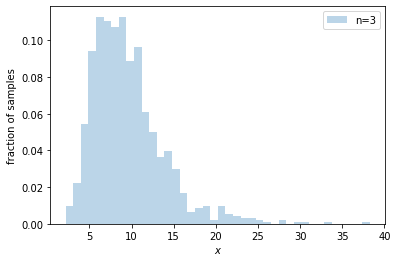

In [36]:
# При разных n случайной выборки можно увидеть разное распределение среднего от этих n-эллементов
samples_mean=[]
n=3
for i in range(1000):
    s=lognorm.rvs(size=n)
    samples_mean.append(s.mean())
hist_n3=np.array(samples_mean)
plt.hist(hist_n3, histtype='stepfilled', alpha=0.3, density=True, bins=40, label=f"n={n}")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

### n=[5,10,50,100]

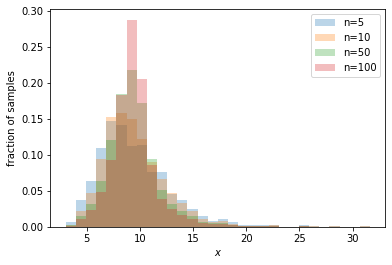

In [37]:
# Разные n нанёс на один график. Минус: сливается. Плюс: видно, распределение собирается вокруг среднего при повышении n
samples_mean=[]
n=[5,10,50,100]
for j in n:
    for i in range(1000):
        s=lognorm.rvs(size=j)
        samples_mean.append(s.mean())
    hist=np.array(samples_mean)
    plt.hist(hist, histtype='stepfilled', alpha=0.3, density=True, bins=30, label=f"n={j}")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

### n=100

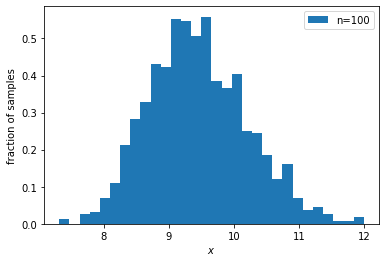

In [38]:
samples_mean_n100=[]
n=100
for i in range(1000):
    s=lognorm.rvs(size=n)
    samples_mean_n100.append(s.mean())
hist_n100=np.array(samples_mean_n100)
plt.hist(hist_n100, density=True, bins=30, label=f"n={n}")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

Теоретическая оценка среднего и дисперсии нашего логнормированного распределения
$$ EX =\exp(mu^2 + sigma^2/2)$$
$$ DE =(\exp(sigma^2)-1)\exp(2mu+sigma^2)$$

In [64]:
mu_norm=m.exp(mu+(sigma**2)/2)
sigma_norm=((m.exp(sigma**2)-1)*m.exp(2*mu+sigma**2))
print('Оценка мат. ожидания и дисперсии по формуле:')
print(mu_norm,sigma_norm)
print()
print('Оценка мат. ожидания и дисперсии встроенной функцией распределения:')
print(lognorm.stats())

Оценка мат. ожидания и дисперсии по формуле:
9.440415556460355 56.352935774951334

Оценка мат. ожидания и дисперсии встроенной функцией распределения:
(array(9.44041556), array(56.35293577))


### Теоретическая оценка нормального распределения и гистограмма среднего случайной выборки нашего распределения при n=5 10 50 100

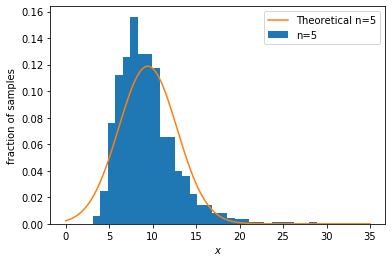

In [71]:
samples_mean_n5=[]
n=5
s=[]
for i in range(1000):
    s=lognorm.rvs(size=n)
    samples_mean_n5.append(s.mean())

plt.hist(samples_mean_n5, density=True, bins=30, label=f"n={n}") # Гистограмма построенная на нашем распределеннии

norm_rv = sts.norm(mu_norm, np.sqrt(sigma_norm/n)) # Теореритческая кривая плотности распределения
x = np.linspace(0,35,500)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf ,label= f'Theoretical n={n}')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

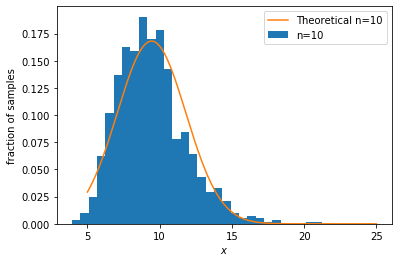

In [69]:
samples_mean_n10=[]
n=10
s=[]
for i in range(1000):
    s=lognorm.rvs(size=n)
    samples_mean_n10.append(s.mean())

plt.hist(samples_mean_n10, density=True, bins=30, label=f"n={n}") # Гистограмма построенная на нашем распределеннии

norm_rv = sts.norm(mu_norm, np.sqrt(sigma_norm/n)) # Теореритческая кривая плотности распределения
x = np.linspace(5,25,500)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf ,label= f'Theoretical n={n}')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

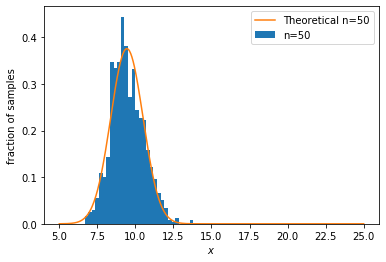

In [72]:
samples_mean_n50=[]
n=50
s=[]
for i in range(1000):
    s=lognorm.rvs(size=n)
    samples_mean_n50.append(s.mean())

plt.hist(samples_mean_n50, density=True, bins=30, label=f"n={n}") # Гистограмма построенная на нашем распределеннии

norm_rv = sts.norm(mu_norm, np.sqrt(sigma_norm/n)) # Теореритческая кривая плотности распределения
x = np.linspace(5,25,500)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf ,label= f'Theoretical n={n}')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

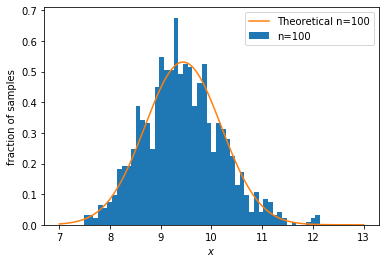

In [73]:
samples_mean_n100=[]
s=[]
n=100
for i in range(1000):
    s=lognorm.rvs(size=n)
    samples_mean_n100.append(s.mean())

plt.hist(samples_mean_n100, density=True, bins=50, label=f"n={n}") # Гистограмма построенная на нашем распределеннии

norm_rv = sts.norm(mu_norm, np.sqrt(sigma_norm/n)) # Теореритческая кривая плотности распределения
x = np.linspace(7,13,500)
norm_pdf = norm_rv.pdf(x)
plt.plot(x, norm_pdf ,label= f'Theoretical n={n}')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

### ЦПТ подтвердилась. При увеличении n случайная выборка всё больше и больше похоже на нормальное распределение 